In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.metrics import silhouette_score

In [2]:
wine_df = pd.read_csv("wine.csv")


In [3]:
print(wine_df.head())


   Type  Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0     1    14.23   1.71  2.43        15.6        127     2.80        3.06   
1     1    13.20   1.78  2.14        11.2        100     2.65        2.76   
2     1    13.16   2.36  2.67        18.6        101     2.80        3.24   
3     1    14.37   1.95  2.50        16.8        113     3.85        3.49   
4     1    13.24   2.59  2.87        21.0        118     2.80        2.69   

   Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline  
0           0.28             2.29   5.64  1.04      3.92     1065  
1           0.26             1.28   4.38  1.05      3.40     1050  
2           0.30             2.81   5.68  1.03      3.17     1185  
3           0.24             2.18   7.80  0.86      3.45     1480  
4           0.39             1.82   4.32  1.04      2.93      735  


In [4]:
print(wine_df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB
None


In [5]:
print(wine_df.describe())


             Type     Alcohol       Malic         Ash  Alcalinity   Magnesium  \
count  178.000000  178.000000  178.000000  178.000000  178.000000  178.000000   
mean     1.938202   13.000618    2.336348    2.366517   19.494944   99.741573   
std      0.775035    0.811827    1.117146    0.274344    3.339564   14.282484   
min      1.000000   11.030000    0.740000    1.360000   10.600000   70.000000   
25%      1.000000   12.362500    1.602500    2.210000   17.200000   88.000000   
50%      2.000000   13.050000    1.865000    2.360000   19.500000   98.000000   
75%      3.000000   13.677500    3.082500    2.557500   21.500000  107.000000   
max      3.000000   14.830000    5.800000    3.230000   30.000000  162.000000   

          Phenols  Flavanoids  Nonflavanoids  Proanthocyanins       Color  \
count  178.000000  178.000000     178.000000       178.000000  178.000000   
mean     2.295112    2.029270       0.361854         1.590899    5.058090   
std      0.625851    0.998859       0.1

In [7]:
print(wine_df.isnull().sum())

Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64


In [8]:
print(wine_df.dtypes)

Type                 int64
Alcohol            float64
Malic              float64
Ash                float64
Alcalinity         float64
Magnesium            int64
Phenols            float64
Flavanoids         float64
Nonflavanoids      float64
Proanthocyanins    float64
Color              float64
Hue                float64
Dilution           float64
Proline              int64
dtype: object


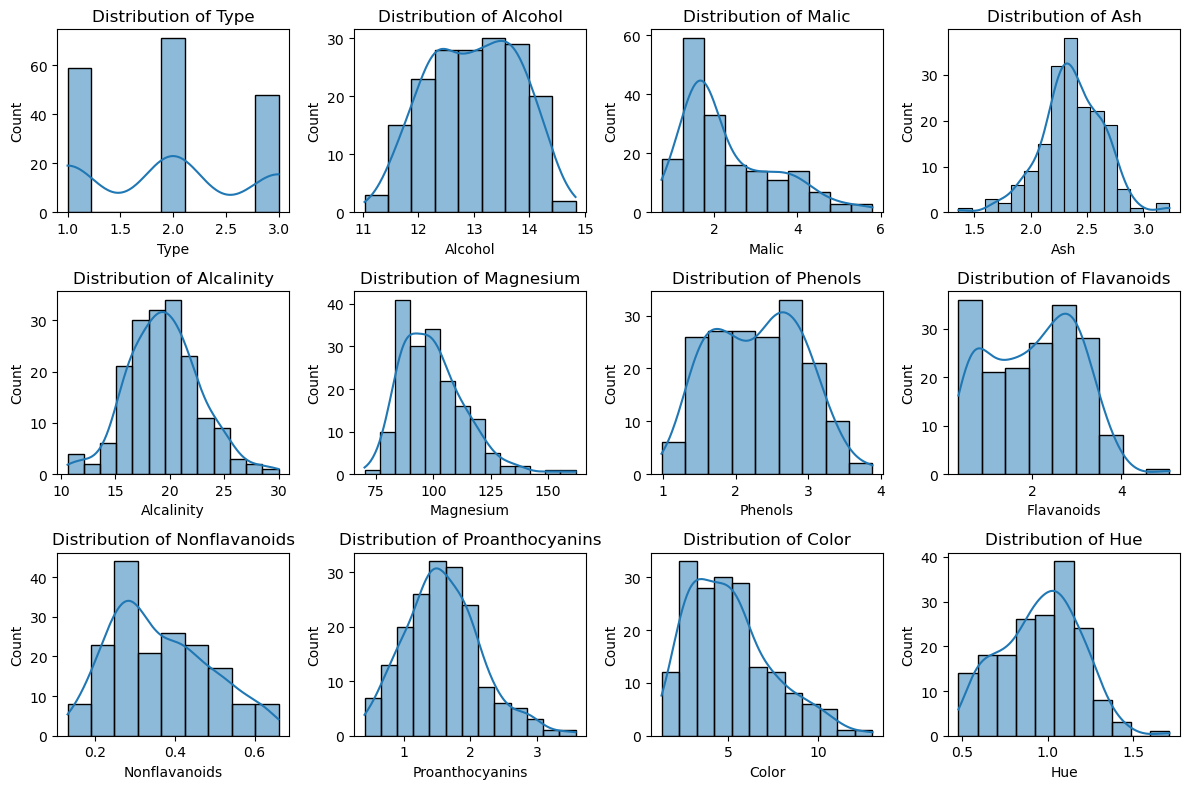

In [12]:
# Visualize the distribution of each feature
plt.figure(figsize=(12, 8))
for i, column in enumerate(wine_df.columns[:-1], 1):
    if i <= 12:
        plt.subplot(3, 4, i)
        sns.histplot(data=wine_df, x=column, kde=True)
        plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()


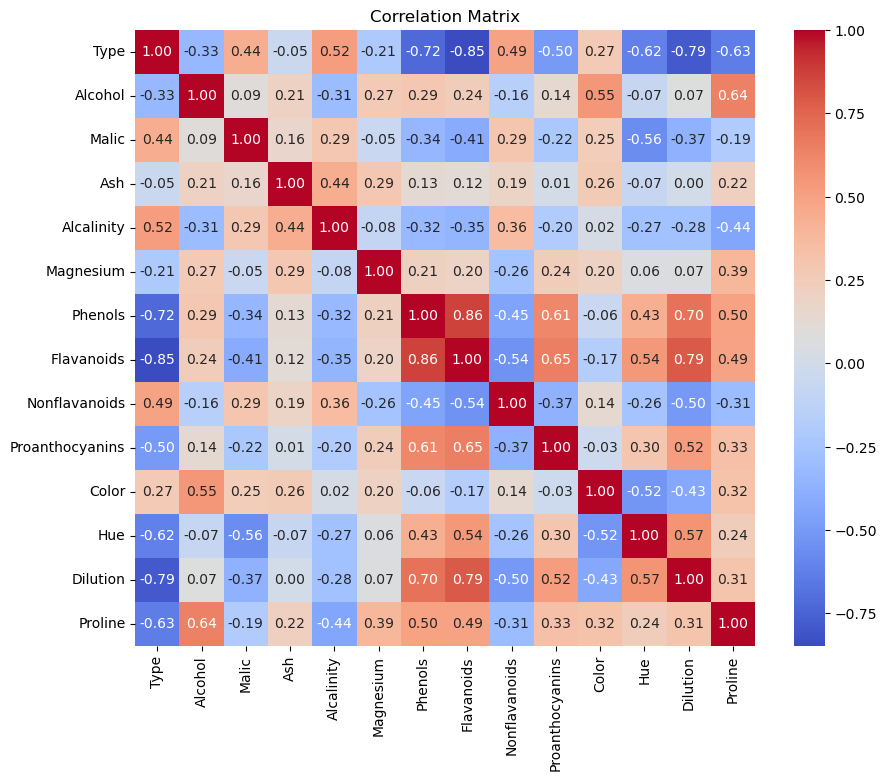

In [14]:
plt.figure(figsize=(10, 8))
sns.heatmap(wine_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


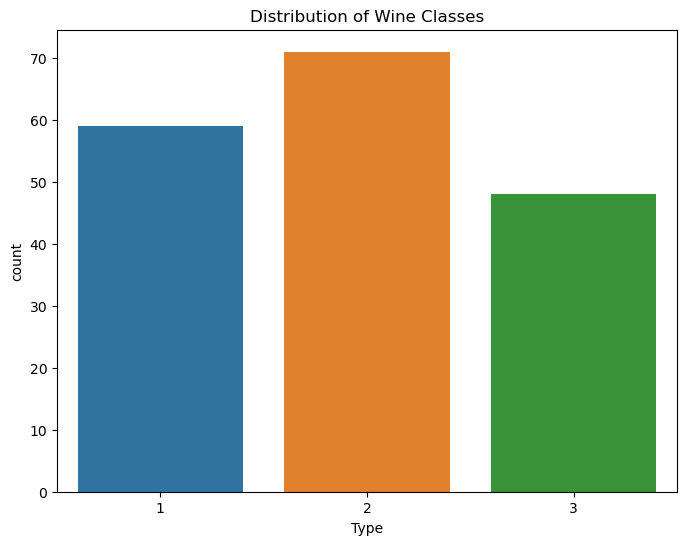

In [17]:
# Visualize the distribution of wine classes using the 'Type' column
plt.figure(figsize=(8, 6))
sns.countplot(data=wine_df, x='Type')
plt.title('Distribution of Wine Classes')
plt.show()


In [21]:
# Separate features and target variable
X = wine_df.drop(columns=['Type'])
y = wine_df['Type']


In [23]:
wine_df.columns


Index(['Type', 'Alcohol', 'Malic', 'Ash', 'Alcalinity', 'Magnesium', 'Phenols',
       'Flavanoids', 'Nonflavanoids', 'Proanthocyanins', 'Color', 'Hue',
       'Dilution', 'Proline'],
      dtype='object')

In [25]:
X = wine_df.drop(columns=['Type'])
y = wine_df['Type']

In [26]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [28]:
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

In [29]:
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2', 'PC3'])
pca_df['Type'] = y.values

In [30]:
print(pca_df.head())


        PC1       PC2       PC3  Type
0  3.316751 -1.443463 -0.165739     1
1  2.209465  0.333393 -2.026457     1
2  2.516740 -1.031151  0.982819     1
3  3.757066 -2.756372 -0.176192     1
4  1.008908 -0.869831  2.026688     1


In [31]:
hierarchical_cluster = AgglomerativeClustering(n_clusters=3)
hierarchical_cluster.fit(X_pca)

AgglomerativeClustering(n_clusters=3)

In [32]:
pca_df['hierarchical_cluster'] = hierarchical_cluster.labels_


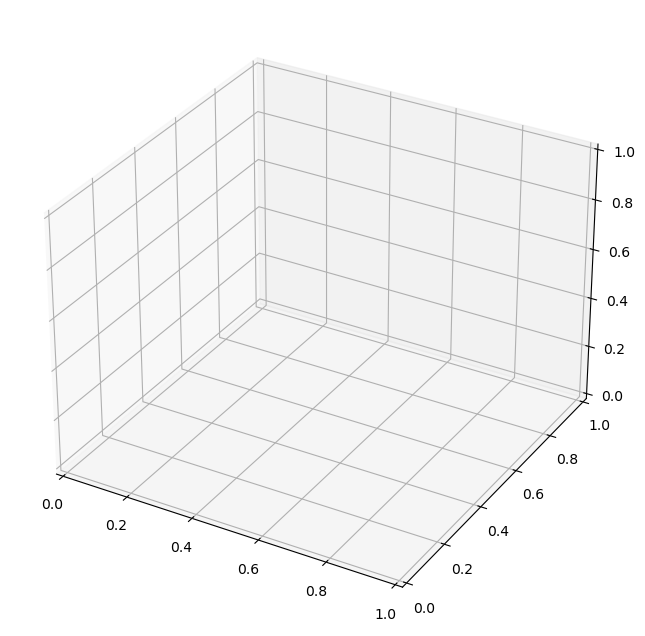

In [33]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

In [34]:
for cluster in pca_df['hierarchical_cluster'].unique():
    cluster_data = pca_df[pca_df['hierarchical_cluster'] == cluster]
    ax.scatter(cluster_data['PC1'], cluster_data['PC2'], cluster_data['PC3'], label=f'Cluster {cluster}')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


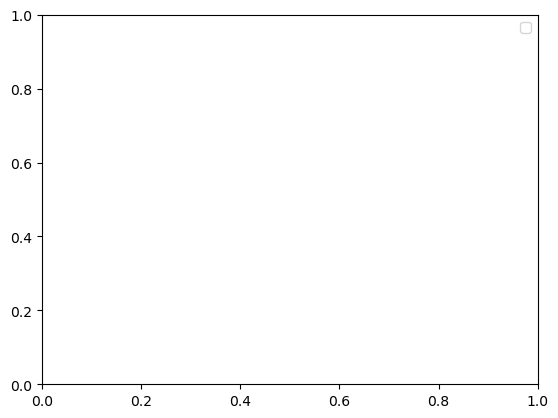

In [35]:
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('Hierarchical Clustering')
plt.legend()
plt.show()


In [37]:
import warnings

# Ignore FutureWarning and UserWarning
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_pca)
    inertia.append(kmeans.inertia_)


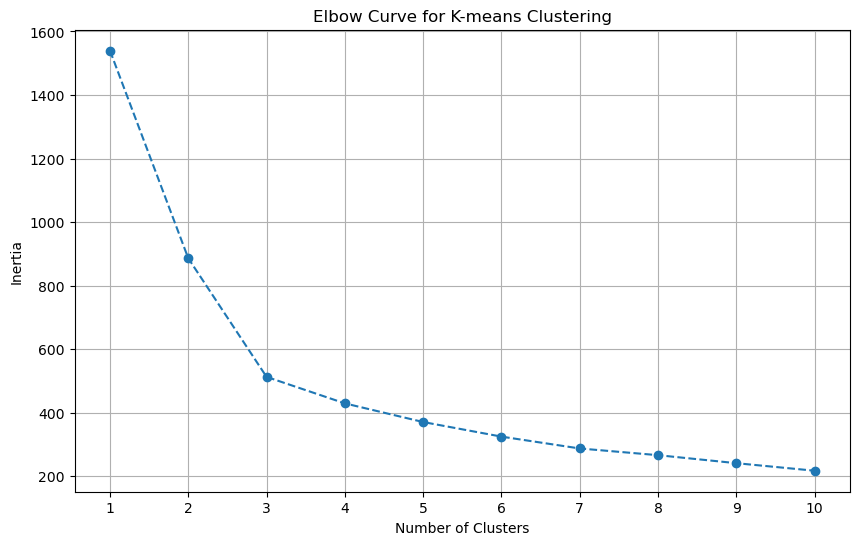

In [38]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Curve for K-means Clustering')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

In [39]:
optimal_clusters = 3


In [40]:
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
kmeans.fit(X_pca)


KMeans(n_clusters=3, random_state=42)

In [41]:
pca_df['kmeans_cluster'] = kmeans.labels_


In [43]:
comparison_df = pd.DataFrame({'Original Class': pca_df['Type'], 
                              'Hierarchical Cluster': pca_df['hierarchical_cluster'],
                              'K-means Cluster': pca_df['kmeans_cluster']})
print(comparison_df.head())


   Original Class  Hierarchical Cluster  K-means Cluster
0               1                     2                1
1               1                     2                1
2               1                     2                1
3               1                     2                1
4               1                     2                1
